In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree

In [16]:
df = pd.read_csv("Bank_Loan_Modelling.csv")

In [17]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [18]:
X = df.drop(['ID', 'Personal Loan'], axis=1)  # Features
y = df['Personal Loan']  # Target variable

In [19]:
# Convert categorical variables into dummy/indicator variables if necessary
X = pd.get_dummies(X)

In [20]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [22]:
#Evaluate the model's performance
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.986
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       895
           1       0.95      0.91      0.93       105

    accuracy                           0.99      1000
   macro avg       0.97      0.95      0.96      1000
weighted avg       0.99      0.99      0.99      1000



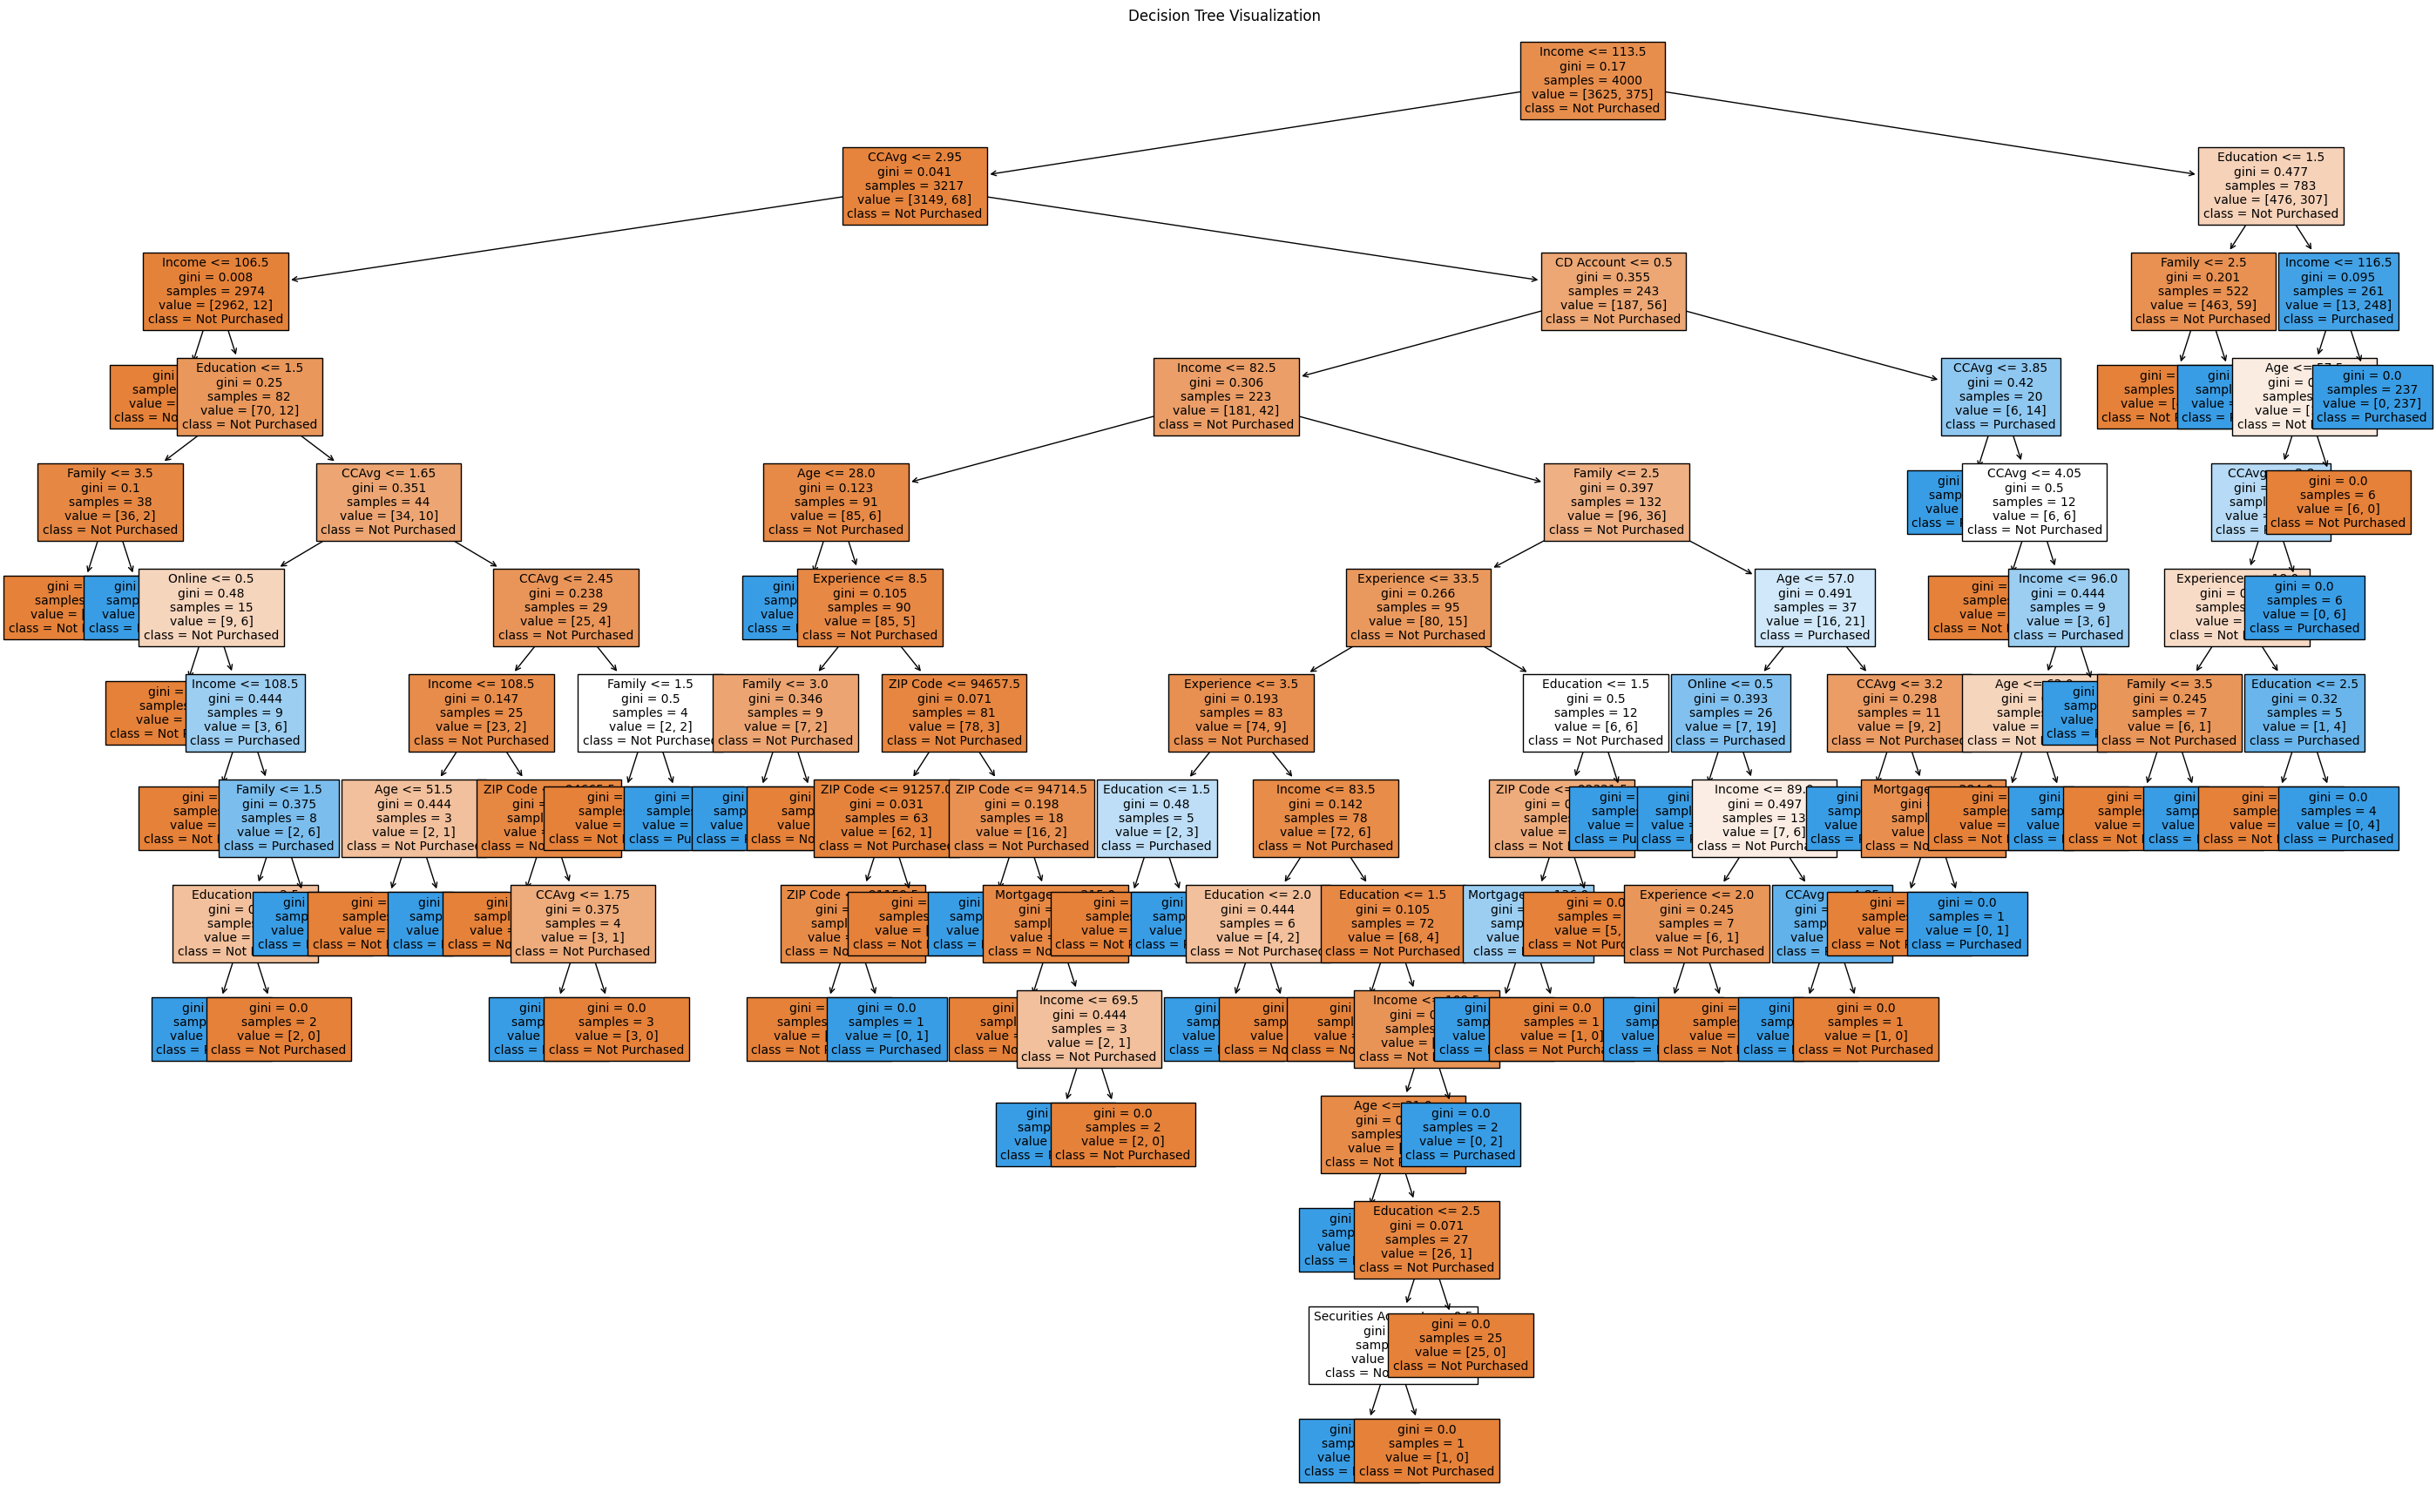

In [30]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(35,22))  # Set the figure size
plot_tree(clf,
          filled=True,  # Fill the nodes with colors
          feature_names=X.columns,  # Set feature names
          class_names=['Not Purchased', 'Purchased'],  # Set class names
          fontsize=10)  # Set font size for text in the tree
plt.title("Decision Tree Visualization")  # Set title
plt.show()